# library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn

# dataset

In [2]:
# data load
X, y = mglearn.datasets.make_forge()

/home/taeyong/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [4]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

In [5]:
X.shape

(26, 2)

In [6]:
y.shape

(26,)

In [7]:
X[:, 0]

array([ 9.96346605, 11.0329545 , 11.54155807,  8.69289001,  8.1062269 ,
        8.30988863, 11.93027136,  9.67284681,  8.34810316,  8.67494727,
        9.17748385, 10.24028948,  8.68937095,  8.92229526,  9.49123469,
        9.25694192,  7.99815287,  8.18378052,  8.7337095 ,  9.32298256,
       10.06393839,  9.50048972,  8.34468785,  9.50169345,  9.15072323,
       11.563957  ])

In [8]:
X[:, 1]

array([ 4.59676542, -0.16816717,  5.21116083,  1.54322016,  4.28695977,
        4.80623966,  4.64866327, -0.20283165,  5.13415623,  4.47573059,
        5.09283177,  2.45544401,  1.48709629, -0.63993225,  4.33224792,
        5.13284858,  4.8525051 ,  1.29564214,  2.49162431,  5.09840649,
        0.99078055, -0.26430318,  1.63824349,  1.93824624,  5.49832246,
        1.3389402 ])

X.shape: (26, 2)


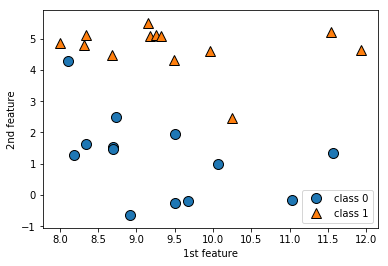

In [9]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("1st feature")
plt.ylabel("2nd feature")
print("X.shape: {}".format(X.shape))

# k-NN (k-Nearest Neighbors) Classifier

n_neighbors: mumber of neighbor

/home/taeyong/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


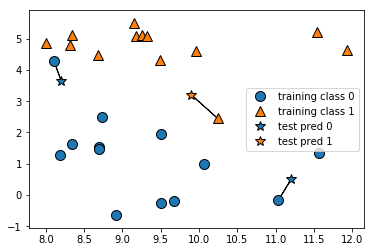

In [10]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

/home/taeyong/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


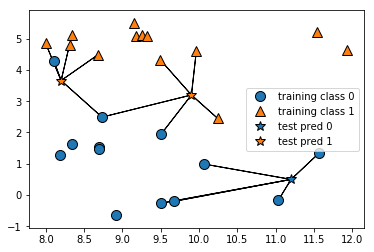

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)

In [14]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [15]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [16]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


# k-NN Classifier Analysis

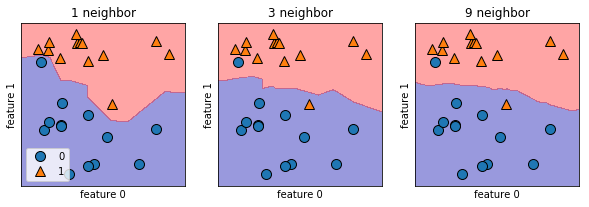

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc=3)

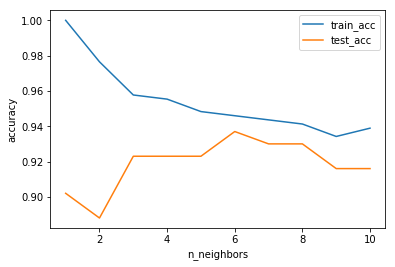

In [18]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1 에서 10 까지 n_neighbors 를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="train_acc")
plt.plot(neighbors_settings, test_accuracy, label="test_acc")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

# K-NN Regressor

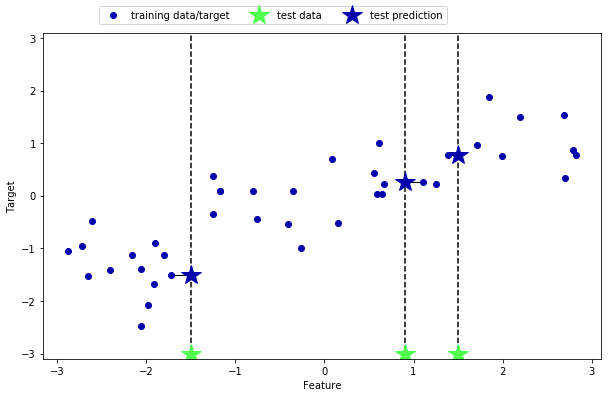

In [19]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

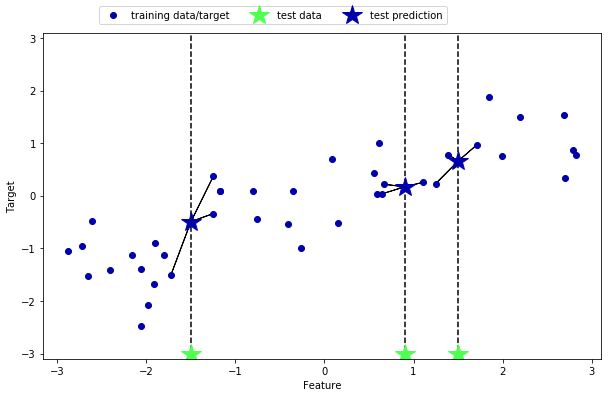

In [20]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [21]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

print(X.shape)
print(y.shape)
print(X)
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

(40, 1)
(40,)
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]]
[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581

In [22]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [23]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
테스트 세트 R^2: 0.83


# K-NN Regressor Analysis

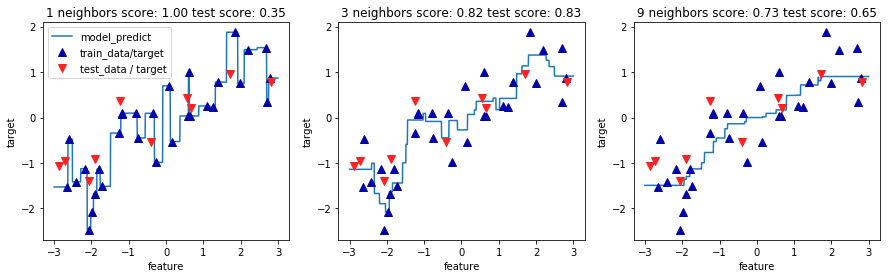

In [24]:
from sklearn.neighbors import KNeighborsRegressor

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)

for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbors score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    
axes[0].legend(["model_predict", "train_data/target", "test_data / target"], loc="best")